In [11]:
import os
import numpy as np
import pandas as pd
from Nearest_Neighbour import NearestNeighbour
from LSH import LSH
from sklearn.metrics import f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from matplotlib import pyplot as plt
from helper_fns import data_read_convert_to_np_array, split_train_test, preprocess_text_data, read_label_from_text_file

In [12]:
data_path = "H:\\sonu\\tipr\\Assignment1\\data\\"

In [13]:
dolph_data = data_read_convert_to_np_array(data_path+"dolphins\\dolphins.csv")
dolph_label = data_read_convert_to_np_array(data_path+"dolphins\\dolphins_label.csv")
# dolph_train, dolph_train_lab, dolph_test, dolph_test_lab = split_train_test(
#     dolph_data, dolph_label)

In [14]:
from sklearn.decomposition import PCA

In [25]:
def experiment_with_pca_using_scikit_library(data_np_2d, label_data, bow=False):
    full_dim = data_np_2d.shape[1]
    red_dim = [2*i for i in range(2,int(full_dim/4)+1)]
    micro_nn = [ ]
    macro_nn = [ ]
    micro_bayes = []
    macro_bayes = []
    
    for dim in red_dim:
        pca = PCA(n_components = dim)
        
        train, train_lab, test, test_lab = split_train_test(data_np_2d, label_data)
        red_train = pca.fit_transform(train)
        nn = KNeighborsClassifier(n_neighbors=1)
        nn.fit(red_train, train_lab)
        
        red_test = pca.transform(test)
        pred_lab = nn.predict(red_test)
        
        micro_nn.append(f1_score(test_lab, pred_lab, average = "micro"))
        macro_nn.append(f1_score(test_lab, pred_lab, average = "macro"))
        
        if bow:
            b_clf = MultinomialNB()
        else:
            b_clf = GaussianNB()
        pred_lab = b_clf.fit(red_train, train_lab).predict(red_test)
        
        micro_bayes.append(f1_score(test_lab, pred_lab, average = "micro"))
        macro_bayes.append(f1_score(test_lab, pred_lab, average = "macro"))
        
    plt.figure(figsize=(10,6))
    plt.xlabel("reduced dimension values")
    plt.plot(red_dim, micro_nn, label="micro")
    plt.plot(red_dim, macro_nn, label = "macro")
    plt.title("nn_classifier")
    plt.legend()
    plt.show()
    plt.figure(figsize=(10,6))
    plt.xlabel("reduced dimension values")
    plt.plot(red_dim, micro_bayes, label="micro")
    plt.plot(red_dim, macro_bayes, label = "macro")
    plt.title("bayes_classifier")
    plt.legend()
    plt.show()
    return micro_nn,macro_nn, micro_bayes, macro_bayes

In [24]:
def experiment_LSH_red_dim_using_scikit_library(data_np_2d, label_data, bow=False):
    full_dim = data_np_2d.shape[1]
    red_dim = [2*i for i in range(2,int(full_dim/4)+1)]
    micro_nn = [ ]
    macro_nn = [ ]
    micro_bayes = []
    macro_bayes = []
    
    for dim in red_dim:
        lsh = LSH(data_mat = data_np_2d)
        red_data = lsh.fit(num_bands = dim)
        
        red_train, train_lab, red_test, test_lab = split_train_test(red_data, label_data)
        
        nn = KNeighborsClassifier(n_neighbors=1)
        nn.fit(red_train, train_lab)
        
        pred_lab = nn.predict(red_test)
        
        micro_nn.append(f1_score(test_lab, pred_lab, average = "micro"))
        macro_nn.append(f1_score(test_lab, pred_lab, average = "macro"))
        
        if bow:
            b_clf = MultinomialNB()
        else:
            b_clf = GaussianNB()
        pred_lab = b_clf.fit(red_train, train_lab).predict(red_test)
        
        micro_bayes.append(f1_score(test_lab, pred_lab, average = "micro"))
        macro_bayes.append(f1_score(test_lab, pred_lab, average = "macro"))
        
    plt.figure(figsize=(10,6))
    plt.xlabel("reduced dimension values")
    plt.plot(red_dim, micro_nn, label="micro")
    plt.plot(red_dim, macro_nn, label = "macro")
    plt.title("nn_classifier")
    plt.legend()
    plt.show()
    plt.figure(figsize=(10,6))
    plt.xlabel("reduced dimension values")
    plt.plot(red_dim, micro_bayes, label="micro")
    plt.plot(red_dim, macro_bayes, label = "macro")
    plt.title("bayes_classifier")
    plt.legend()
    plt.show()
    return micro_nn,macro_nn, micro_bayes, macro_bayes

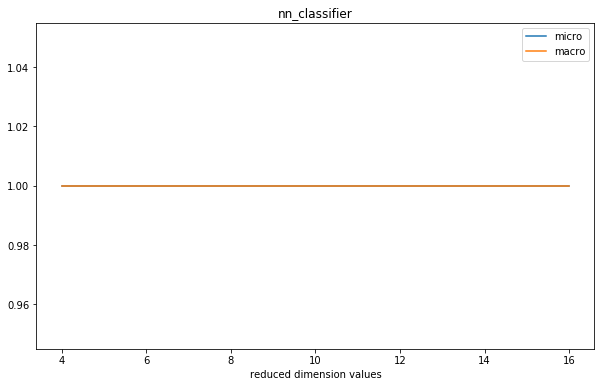

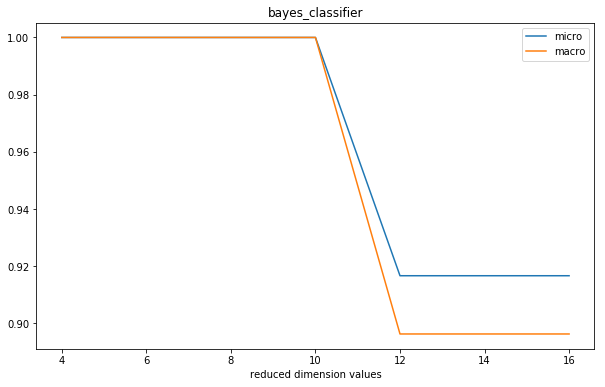

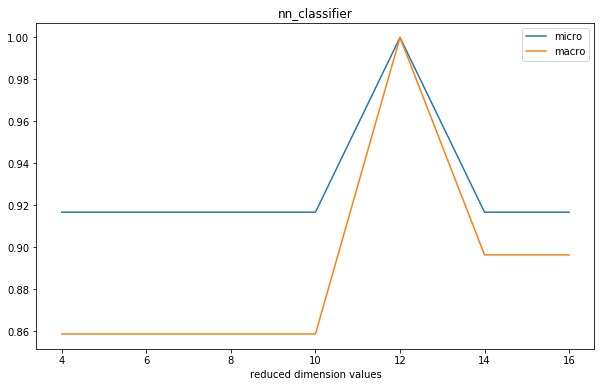

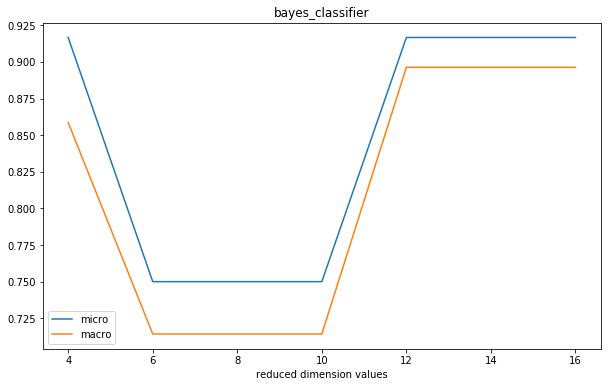

In [17]:
pca_micro_nn,_,pca_micro_b,_ = experiment_with_pca_using_scikit_library(dolph_data, dolph_label)
dolph_data = data_read_convert_to_np_array(data_path+"dolphins\\dolphins.csv")
dolph_label = data_read_convert_to_np_array(data_path+"dolphins\\dolphins_label.csv")
lsh_micro_nn,_,lsh_micro_b,_ = experiment_LSH_red_dim_using_scikit_library(dolph_data, dolph_label)

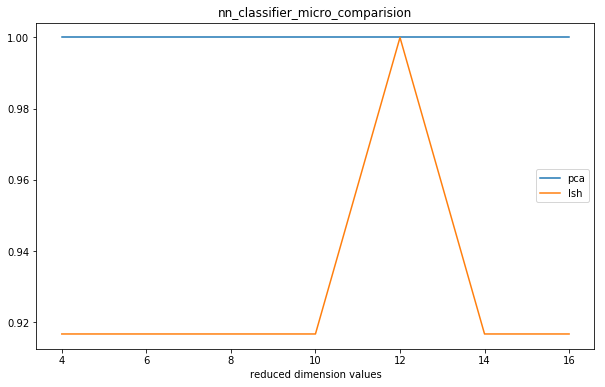

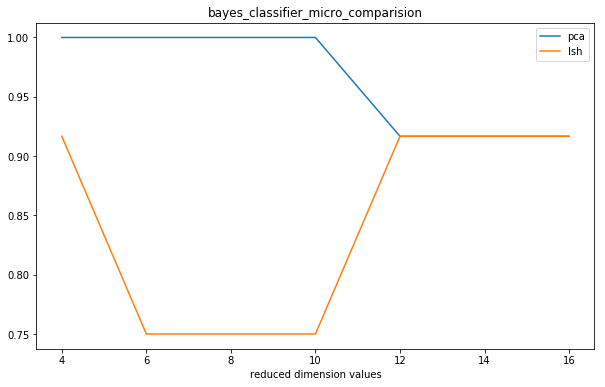

In [21]:
full_dim = dolph_data.shape[1]
red_dim = [2*i for i in range(2,int(full_dim/4)+1)]
plt.figure(figsize=(10,6))
plt.xlabel("reduced dimension values")
plt.plot(red_dim, pca_micro_nn, label="pca")
plt.plot(red_dim, lsh_micro_nn, label = "lsh")
plt.title("nn_classifier_micro_comparision")
plt.legend()
plt.show()
plt.figure(figsize=(10,6))
plt.xlabel("reduced dimension values")
plt.plot(red_dim, pca_micro_b, label="pca")
plt.plot(red_dim, lsh_micro_b, label = "lsh")
plt.title("bayes_classifier_micro_comparision")
plt.legend()
plt.show()

## pubmed dataset

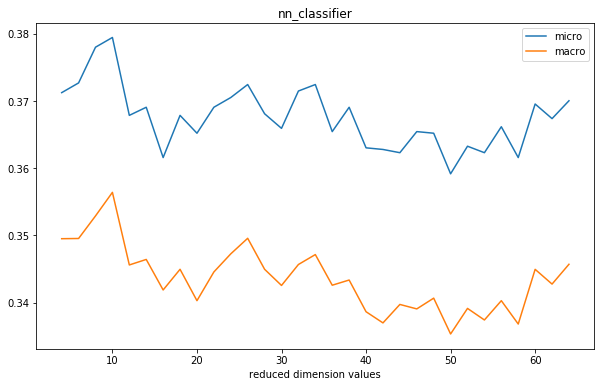

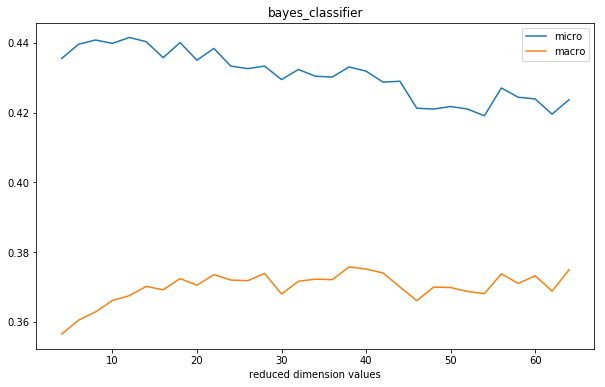

C:\Users\vissim\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vissim\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vissim\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vissim\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', ave

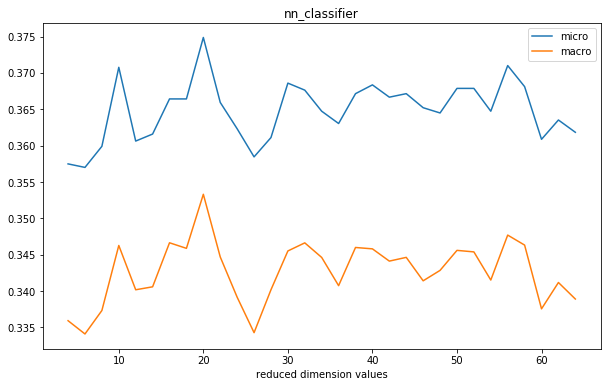

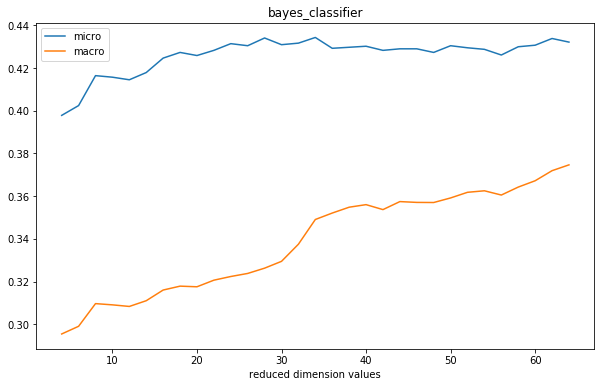

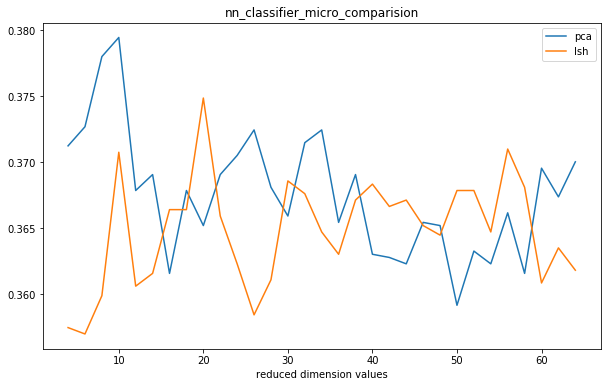

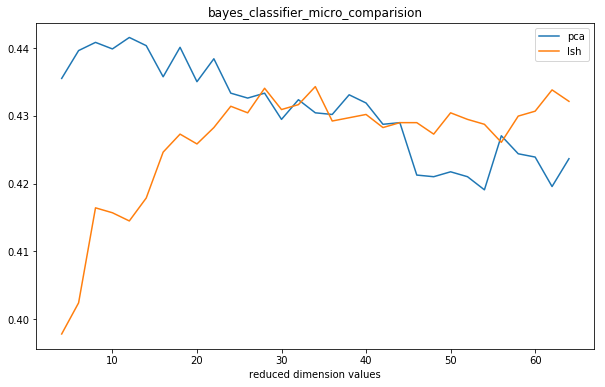

In [22]:
dolph_data = data_read_convert_to_np_array(data_path+"pubmed\\pubmed.csv")
dolph_label = data_read_convert_to_np_array(data_path+"pubmed\\pubmed_label.csv")
dolph_train, dolph_train_lab, dolph_test, dolph_test_lab = split_train_test(
    dolph_data, dolph_label)

pca_micro_nn,_,pca_micro_b,_ = experiment_with_pca_using_scikit_library(dolph_data, dolph_label)
dolph_data = data_read_convert_to_np_array(data_path+"pubmed\\pubmed.csv")
dolph_label = data_read_convert_to_np_array(data_path+"pubmed\\pubmed_label.csv")
lsh_micro_nn,_,lsh_micro_b,_ = experiment_LSH_red_dim_using_scikit_library(dolph_data, dolph_label)

full_dim = dolph_data.shape[1]
red_dim = [2*i for i in range(2,int(full_dim/4)+1)]
plt.figure(figsize=(10,6))
plt.xlabel("reduced dimension values")
plt.plot(red_dim, pca_micro_nn, label="pca")
plt.plot(red_dim, lsh_micro_nn, label = "lsh")
plt.title("nn_classifier_micro_comparision")
plt.legend()
plt.show()
plt.figure(figsize=(10,6))
plt.xlabel("reduced dimension values")
plt.plot(red_dim, pca_micro_b, label="pca")
plt.plot(red_dim, lsh_micro_b, label = "lsh")
plt.title("bayes_classifier_micro_comparision")
plt.legend()
plt.show()

## twitter dataset
## cant use multinomial naive bayes on pca reduced data , because of negative values

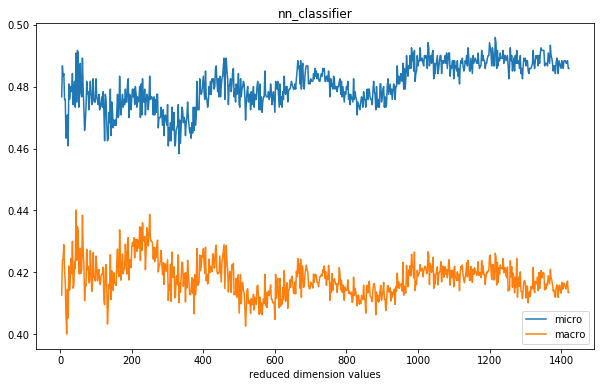

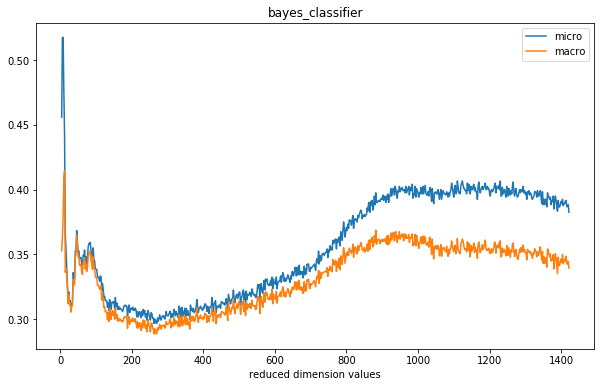

C:\Users\vissim\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vissim\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vissim\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vissim\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', ave

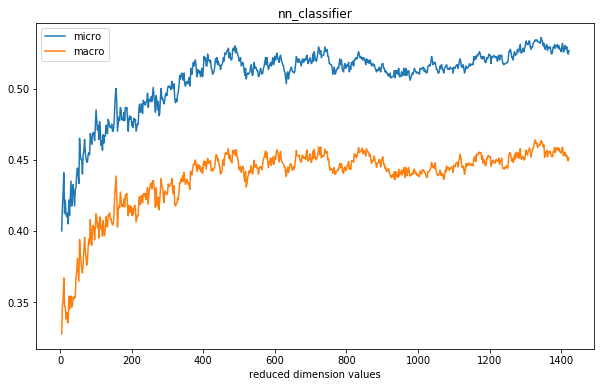

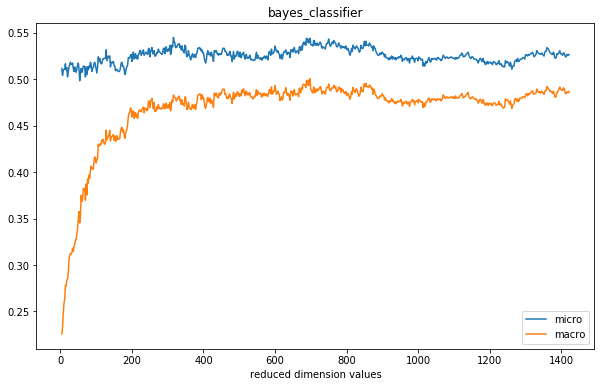

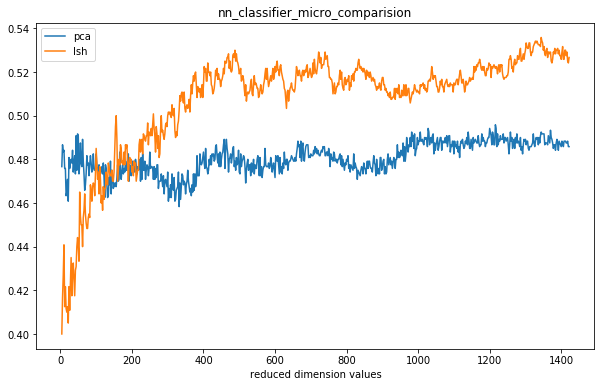

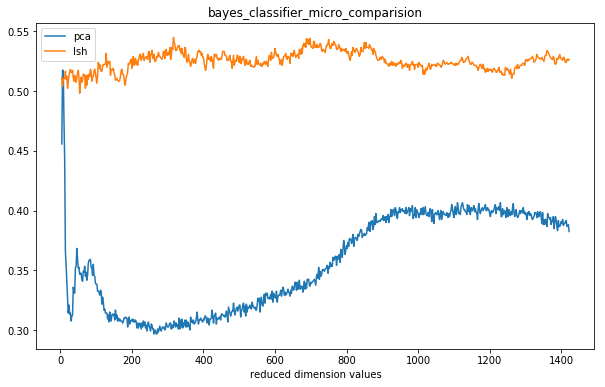

In [27]:
dolph_data = preprocess_text_data(data_path+"twitter\\twitter.txt")
dolph_label = read_label_from_text_file(data_path+"twitter\\twitter_label.txt")
dolph_train, dolph_train_lab, dolph_test, dolph_test_lab = split_train_test(
    dolph_data, dolph_label)

pca_micro_nn,_,pca_micro_b,_ = experiment_with_pca_using_scikit_library(dolph_data, dolph_label, bow = False)

dolph_data = preprocess_text_data(data_path+"twitter\\twitter.txt")
dolph_label = read_label_from_text_file(data_path+"twitter\\twitter_label.txt")
lsh_micro_nn,_,lsh_micro_b,_ = experiment_LSH_red_dim_using_scikit_library(dolph_data, dolph_label, bow = False)

full_dim = dolph_data.shape[1]
red_dim = [2*i for i in range(2,int(full_dim/4)+1)]
plt.figure(figsize=(10,6))
plt.xlabel("reduced dimension values")
plt.plot(red_dim, pca_micro_nn, label="pca")
plt.plot(red_dim, lsh_micro_nn, label = "lsh")
plt.title("nn_classifier_micro_comparision")
plt.legend()
plt.show()
plt.figure(figsize=(10,6))
plt.xlabel("reduced dimension values")
plt.plot(red_dim, pca_micro_b, label="pca")
plt.plot(red_dim, lsh_micro_b, label = "lsh")
plt.title("bayes_classifier_micro_comparision")
plt.legend()
plt.show()